# Chaprer 06 복잡한 데이터 표현하기
- 그래프에 한글을 출력하고 맷플롯립의 객체지향 API를 사용해 그래프를 꾸미는 방법을 알아봅니다.
- 스택 영역 그래프, 스택 막대 그래프, 원 그래프를 그리는 방법을 배웁니다.

## 06-1 객체지향 API로 그래프 꾸미기
### pyplot방식과 객체지향 API 방식

In [1]:
# pyplot 방식으로 그래프 그리기 
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100


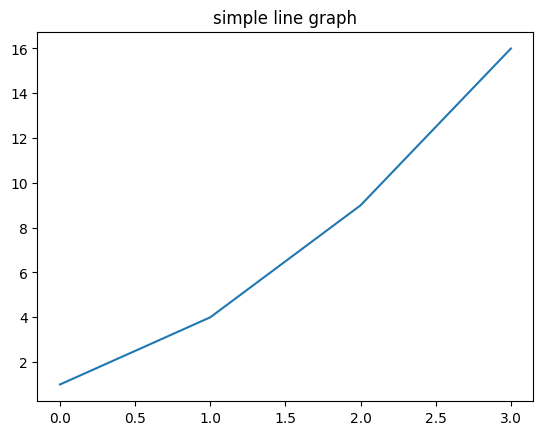

In [2]:
plt.plot([1,4,9,16])
plt.title('simple line graph')
plt.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\2969696740.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


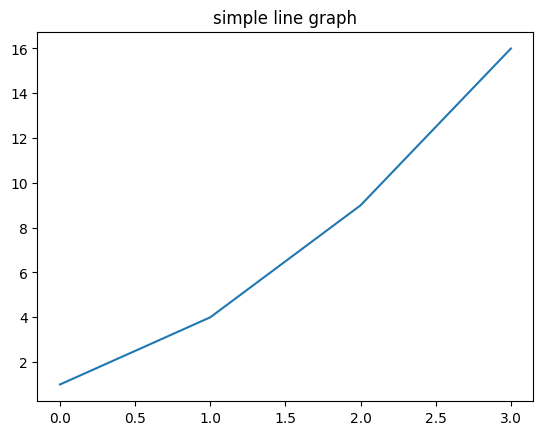

In [3]:
# 객체지향 API 방식으로 그래프 그리기
fig, ax = plt.subplots()
ax.plot([1,4,9,16])
ax.set_title('simple line graph')
fig.show()

### 그래프에 한글 출력하기 

In [4]:
plt.rcParams['font.family']

['sans-serif']

In [5]:
plt.rcParams['font.family'] = 'NanumGothic'

In [6]:
# 폰트 지정하기: rc함수
plt.rc('font', family='NanumGothic')

In [7]:
from matplotlib.font_manager import findSystemFonts

findSystemFonts()

['C:\\Windows\\Fonts\\REFSAN.TTF',
 'C:\\Windows\\Fonts\\ROCKB.TTF',
 'C:\\Windows\\Fonts\\BRUSHSCI.TTF',
 'C:\\Windows\\Fonts\\cour.ttf',
 'C:\\Windows\\Fonts\\NanumGothic.ttf',
 'C:\\Windows\\Fonts\\H2GPRM.TTF',
 'C:\\Windows\\Fonts\\msyh.ttc',
 'C:\\Windows\\Fonts\\HPSimplified_Rg.ttf',
 'C:\\Windows\\Fonts\\corbelz.ttf',
 'C:\\Windows\\Fonts\\YuGothL.ttc',
 'C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\Windows\\Fonts\\Gabriola.ttf',
 'C:\\Windows\\Fonts\\phagspa.ttf',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\CALISTI.TTF',
 'C:\\Windows\\Fonts\\LTYPEBO.TTF',
 'C:\\Windows\\Fonts\\ntailub.ttf',
 'C:\\Windows\\Fonts\\HPSimplified_Lt.ttf',
 'C:\\Windows\\Fonts\\GOUDOSB.TTF',
 'C:\\Windows\\Fonts\\ONYX.TTF',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\VINERITC.TTF',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\msgothic.ttc',
 'C:\\Windows\\Fonts\\msjhl.ttc',
 'C:\\Windows\\Fonts\\seguibl.ttf',
 'C:\\Windows\\Fonts\

In [8]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumGothic'] 10.0


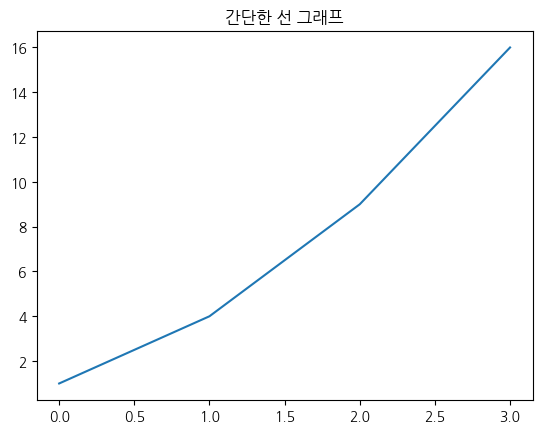

In [9]:
plt.plot([1,4,9,16])
plt.title('간단한 선 그래프')
plt.show()

In [10]:
plt.rc('font', size=10)

### 출판사별 발행 도서 개수 산점도 그리기

In [11]:
!pip install gdown

In [12]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: d:\data-anlaysis\data-analysis-study\ns_book7.csv
100%|██████████| 53.8M/53.8M [00:06<00:00, 8.71MB/s]


'ns_book7.csv'

In [13]:
import pandas as pd
ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [14]:
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

출판사
문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: count, dtype: int64

In [15]:
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)


In [16]:
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [17]:
top30_pubs_idx.sum()

51886

In [18]:
# 5만개가 넘기에 무작위 1000개 샘플 선택
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51590,57040,흑백의 여로 :흑백으로 가를 수 없는 존재의 비극,지은이: 나쓰키 시즈코 ;옮긴이: 추지나,문학동네,2018,9788954650106,NaN,0,NaN,833.6,1,8,2018-03-05
275474,295032,빵굽는 CEO,김영모 지음,김영사,2006,9788934919285,NaN,0,NaN,325.04,1,74,2006-10-24
300577,321179,아스테릭스와 예언자,르네 고시니 글;알베르 우데르조 그림;오영주 옮김,문학과지성사,2005,9788932016160,9788932012674,0,20,657.1,3,47,2005-09-20
298782,319333,월인천강지곡의 텍스트 분석,고영근...[등]저,집문당,2003,9788930309820,NaN,NaN,NaN,718.02,1,3,2005-10-12


C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\3477285091.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


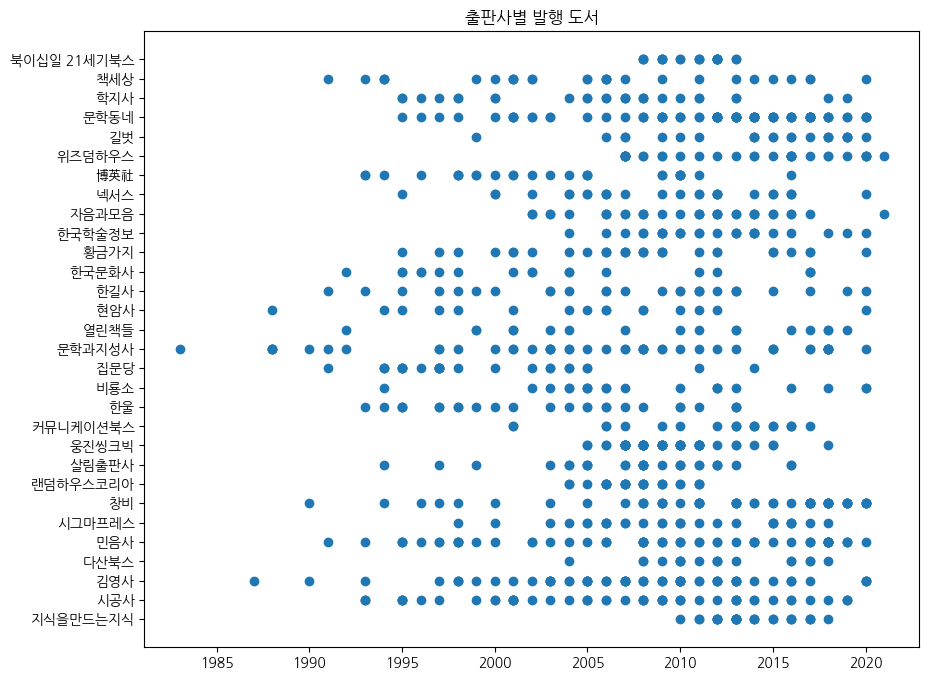

In [20]:
# 산점도 그리기
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행 도서')
fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\984682439.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


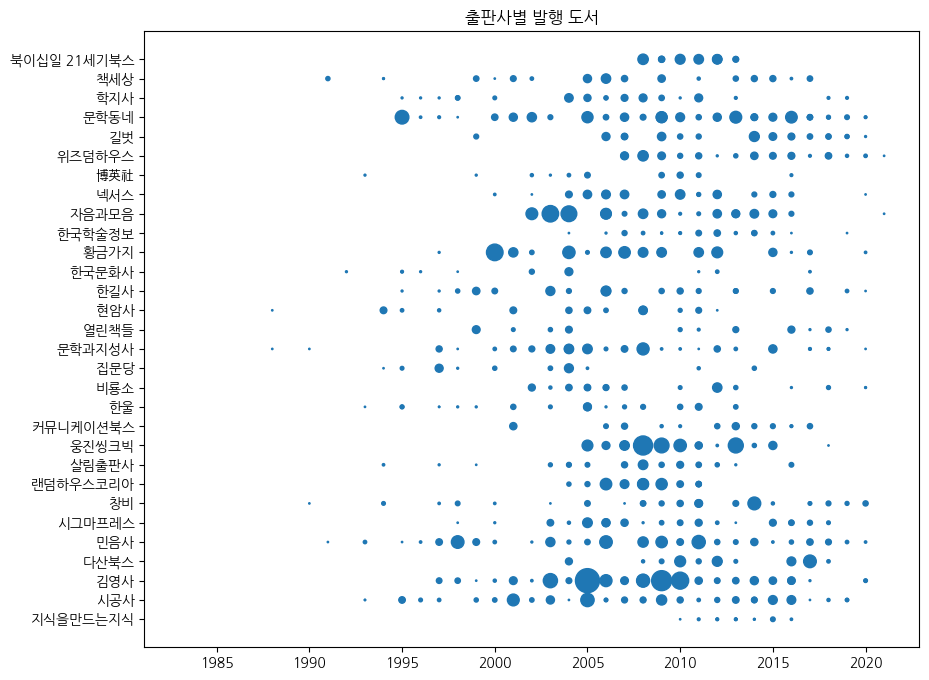

In [21]:
# 값에 따라 마커 크기를 다르게 나타내기
# 산점도 그리기
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
ax.set_title('출판사별 발행 도서')
fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\4162997848.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


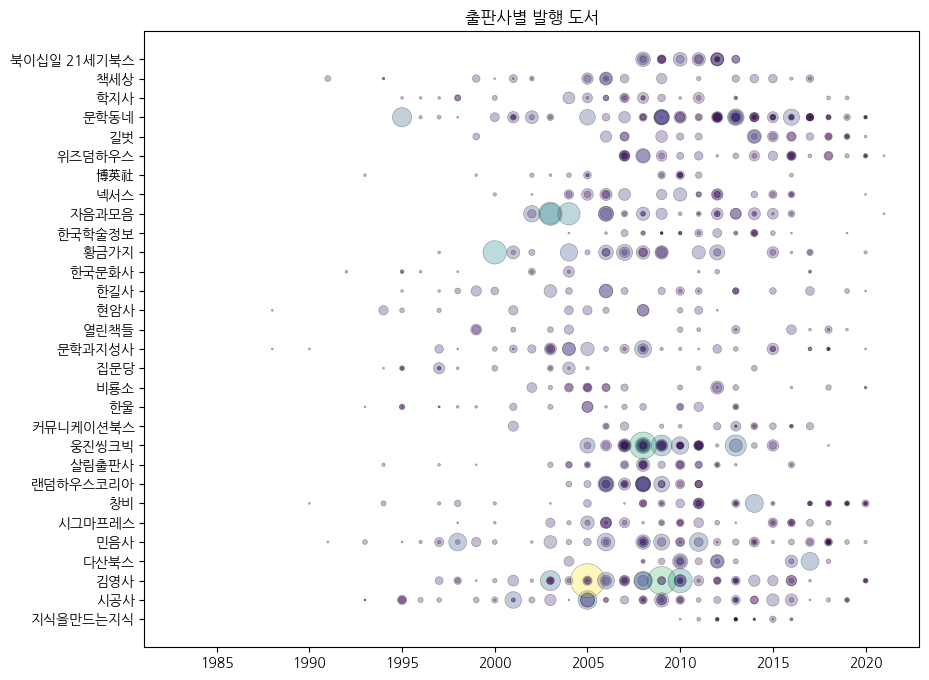

In [22]:
# 마커 꾸미기
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
ax.set_title('출판사별 발행 도서')
fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\2614721938.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


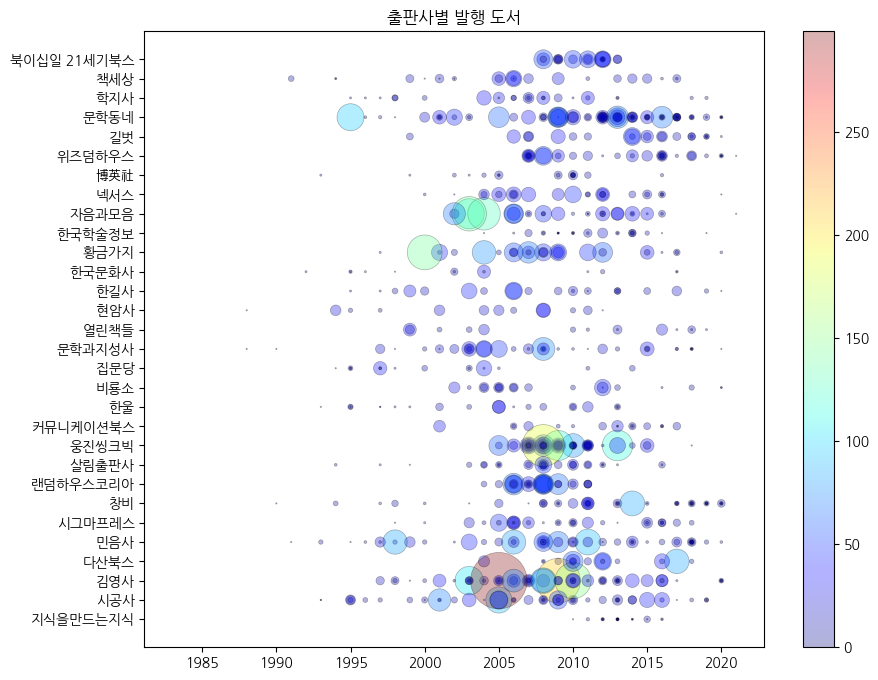

In [24]:
# 값에 따라 색상 표현하기: 컬러맵
fig, ax = plt.subplots(figsize=(10,8))
sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], cmap='jet')
ax.set_title('출판사별 발행 도서')
fig.colorbar(sc)
fig.show()

## 06-2 맷플롯립의 고급 기능 배우기 
- 범례 추가, 선그래프와 막대그래프를 동시에 여러 개 그리기
- 데이터프레임의 피벗 테이블 기능

### 하나의 피겨에 여러 개의 선 그래프 그리기

In [25]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()

In [28]:
ns_book9

,출판사,발행년도,대출건수
0,博英社,1947,0
1,博英社,1975,0
2,博英社,1977,0
3,博英社,1986,1
4,博英社,1987,1
...,...,...,...
881,황금가지,2018,200
882,황금가지,2019,133
883,황금가지,2020,98
884,황금가지,2021,1


In [29]:
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,index,출판사,발행년도,대출건수
858,858,황금가지,1995,0
859,859,황금가지,1996,67
860,860,황금가지,1997,116
861,861,황금가지,1998,526
862,862,황금가지,1999,505


C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\873059296.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


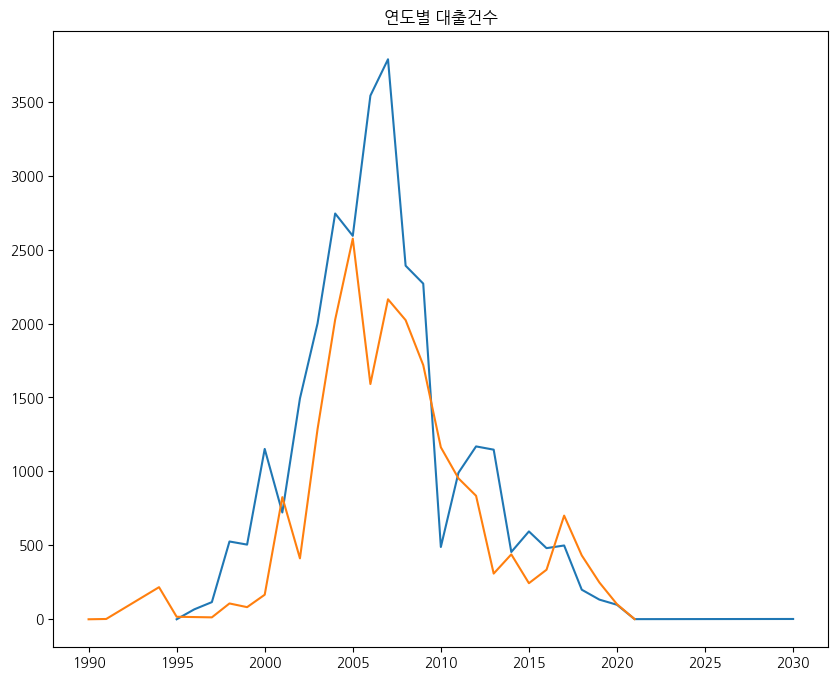

In [30]:
# 선 그래프 2개 그리기
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('연도별 대출건수')
fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\2077483696.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


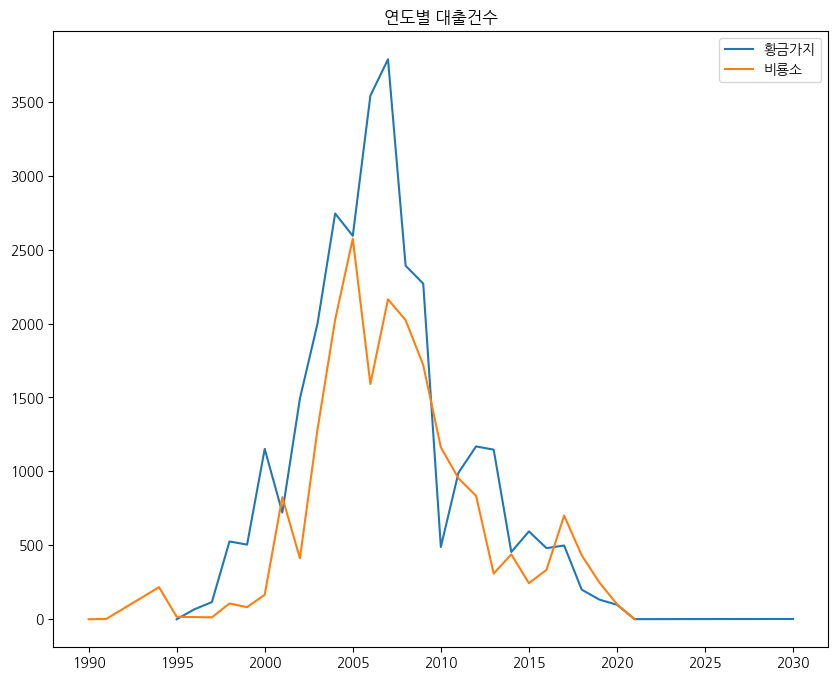

In [31]:
# 범례 추가
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\178092899.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


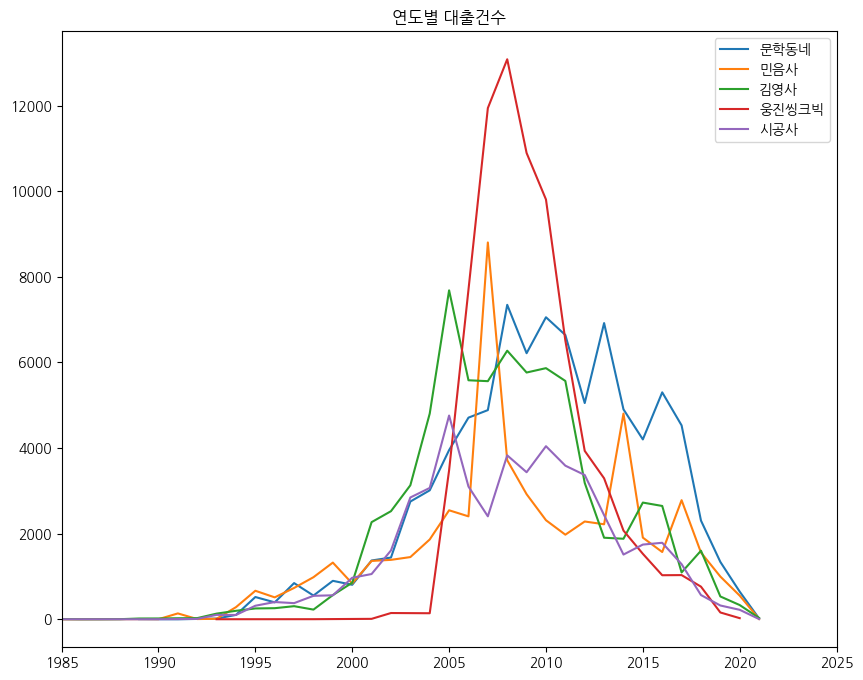

In [34]:
# 선 그래프 5개 그리기
fig, ax = plt.subplots(figsize=(10,8))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('연도별 대출건수')
ax.legend()
ax.set_xlim(1985,2025)
fig.show()


In [35]:
# 스택 영역 그래프 그리기
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도')
ns_book10.head()

index                                                  ...    대출건수  \
발행년도  1947 1974 1975 1976 1977 1978 1979  1980  1981  1982  ...    2013   
출판사                                                         ...           
博英社    0.0  NaN  1.0  NaN  2.0  NaN  NaN   NaN   NaN   NaN  ...     NaN   
길벗     NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  ...  1162.0   
김영사    NaN  NaN  NaN  NaN  NaN  NaN  NaN  64.0  65.0  66.0  ...  1905.0   
넥서스    NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  ...  1828.0   
다산북스   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  ...  1100.0   

                                                                       
발행년도    2014    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                                    
博英社    118.0    57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1619.0  1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   1881.0  2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스   1429.0   765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1361.0  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 100 columns]

In [36]:
ns_book10.columns[:10]

MultiIndex([('index', 1947),
            ('index', 1974),
            ('index', 1975),
            ('index', 1976),
            ('index', 1977),
            ('index', 1978),
            ('index', 1979),
            ('index', 1980),
            ('index', 1981),
            ('index', 1982)],
           names=[None, '발행년도'])

In [37]:
ns_book10.columns

MultiIndex([('index', 1947),
            ('index', 1974),
            ('index', 1975),
            ('index', 1976),
            ('index', 1977),
            ('index', 1978),
            ('index', 1979),
            ('index', 1980),
            ('index', 1981),
            ('index', 1982),
            ('index', 1983),
            ('index', 1984),
            ('index', 1985),
            ('index', 1986),
            ('index', 1987),
            ('index', 1988),
            ('index', 1989),
            ('index', 1990),
            ('index', 1991),
            ('index', 1992),
            ('index', 1993),
            ('index', 1994),
            ('index', 1995),
            ('index', 1996),
            ('index', 1997),
            ('index', 1998),
            ('index', 1999),
            ('index', 2000),
            ('index', 2001),
            ('index', 2002),
            ('index', 2003),
            ('index', 2004),
            ('index', 2005),
            ('index', 2006),
            ('

In [38]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)
year_cols

Index([1947, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2030, 1947, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2030],
      dtype='int64', name='발행년도')

In [40]:
top10_pubs

Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '한울'],
      dtype='object', name='출판사')

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\2875799128.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


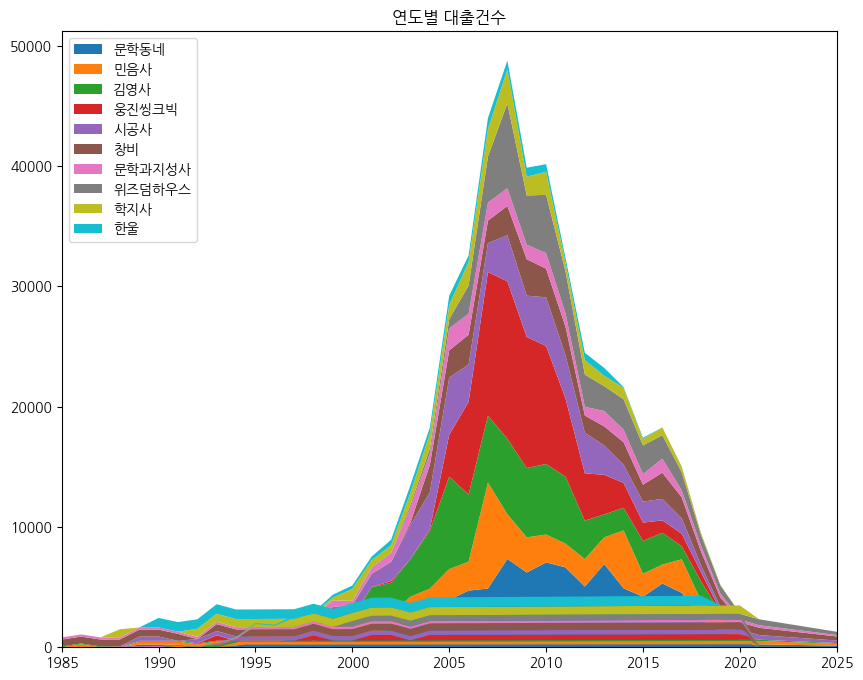

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
ax.set_title('연도별 대출건수')
ax.legend(loc='upper left') #범례 왼쪽 상단에 표시
ax.set_xlim(1985,2025)
fig.show()

### 하나의 피겨에 여러 개의 막대 그래프 그리기

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\1155784891.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


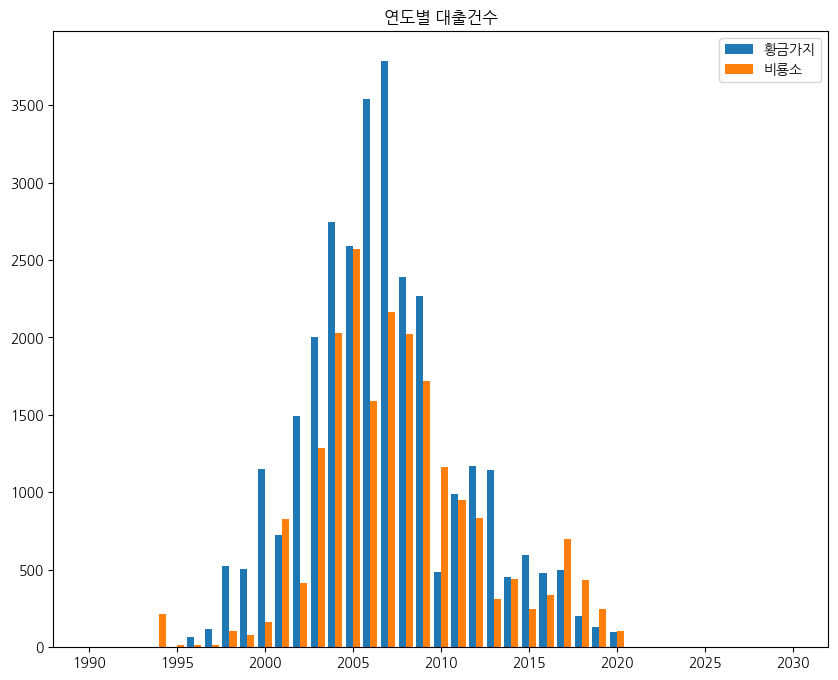

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('연도별 대출건수')
ax.legend()
fig.show()

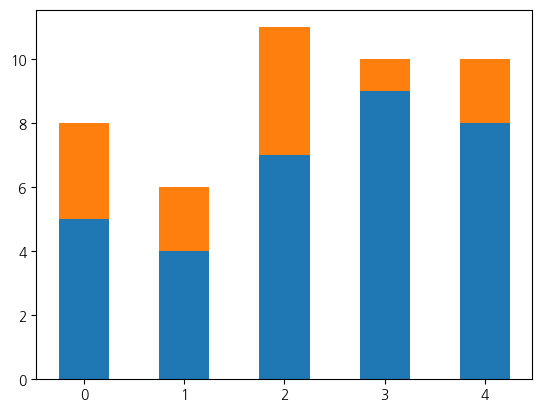

In [45]:
# 스택 막대 그래프 그리기
height1 = [5,4,7,9,8]
height2 = [3,2,4,1,2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

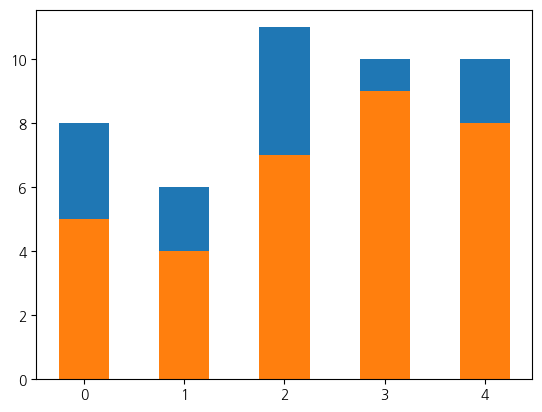

In [46]:
height3 = [a+b for a,b in zip(height1,height2)]
plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()


In [47]:
# 데이터값 누적해서 그리기
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수', 2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
출판사                                                                 
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [48]:
ns_book10.loc[top10_pubs[:5], ('대출건수', 2013):('대출건수', 2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
출판사                                                                       
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [49]:
ns_book12 = ns_book10.loc[top10_pubs].cumsum()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\1835218293.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


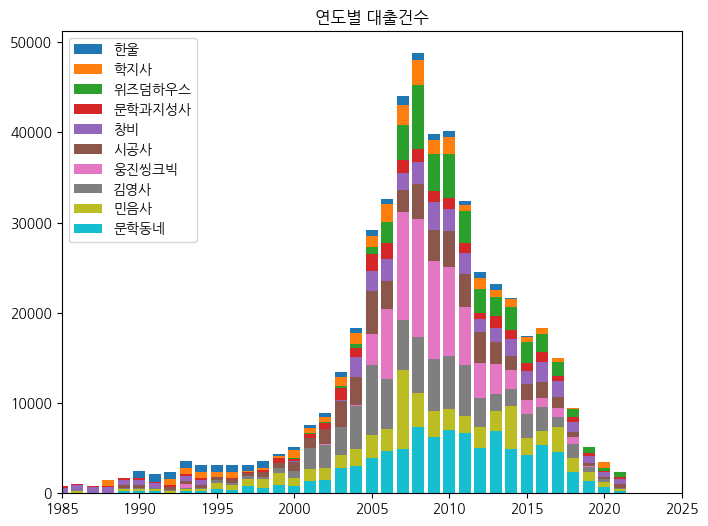

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]
    label = ns_book12.index[i]
    ax.bar(year_cols, bar, label=label)

ax.set_title('연도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985,2025)

fig.show()

### 원 그래프 그리기

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\3503334790.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


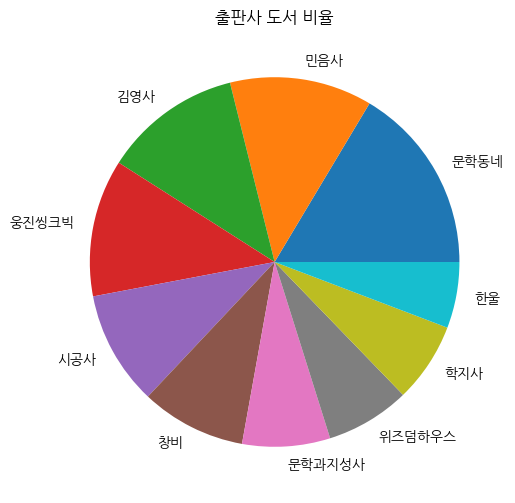

In [51]:
data = top30_pubs[:10]
labels = top30_pubs.index[:10]

fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서 비율')
fig.show()

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\1953157009.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


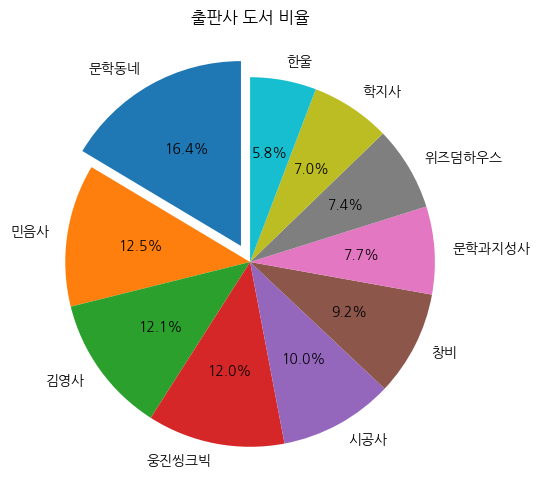

In [52]:
# 비율 표시하고 부채꼴 강조하기
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(data, labels=labels, startangle=90, autopct="%.1f%%", explode=[0.1]+[0]*9)
ax.set_title('출판사 도서 비율')
fig.show()

### 여러 종류의 그래프가 있는 서브플롯 그리기

C:\Users\dasap\AppData\Local\Temp\ipykernel_29644\2405627039.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


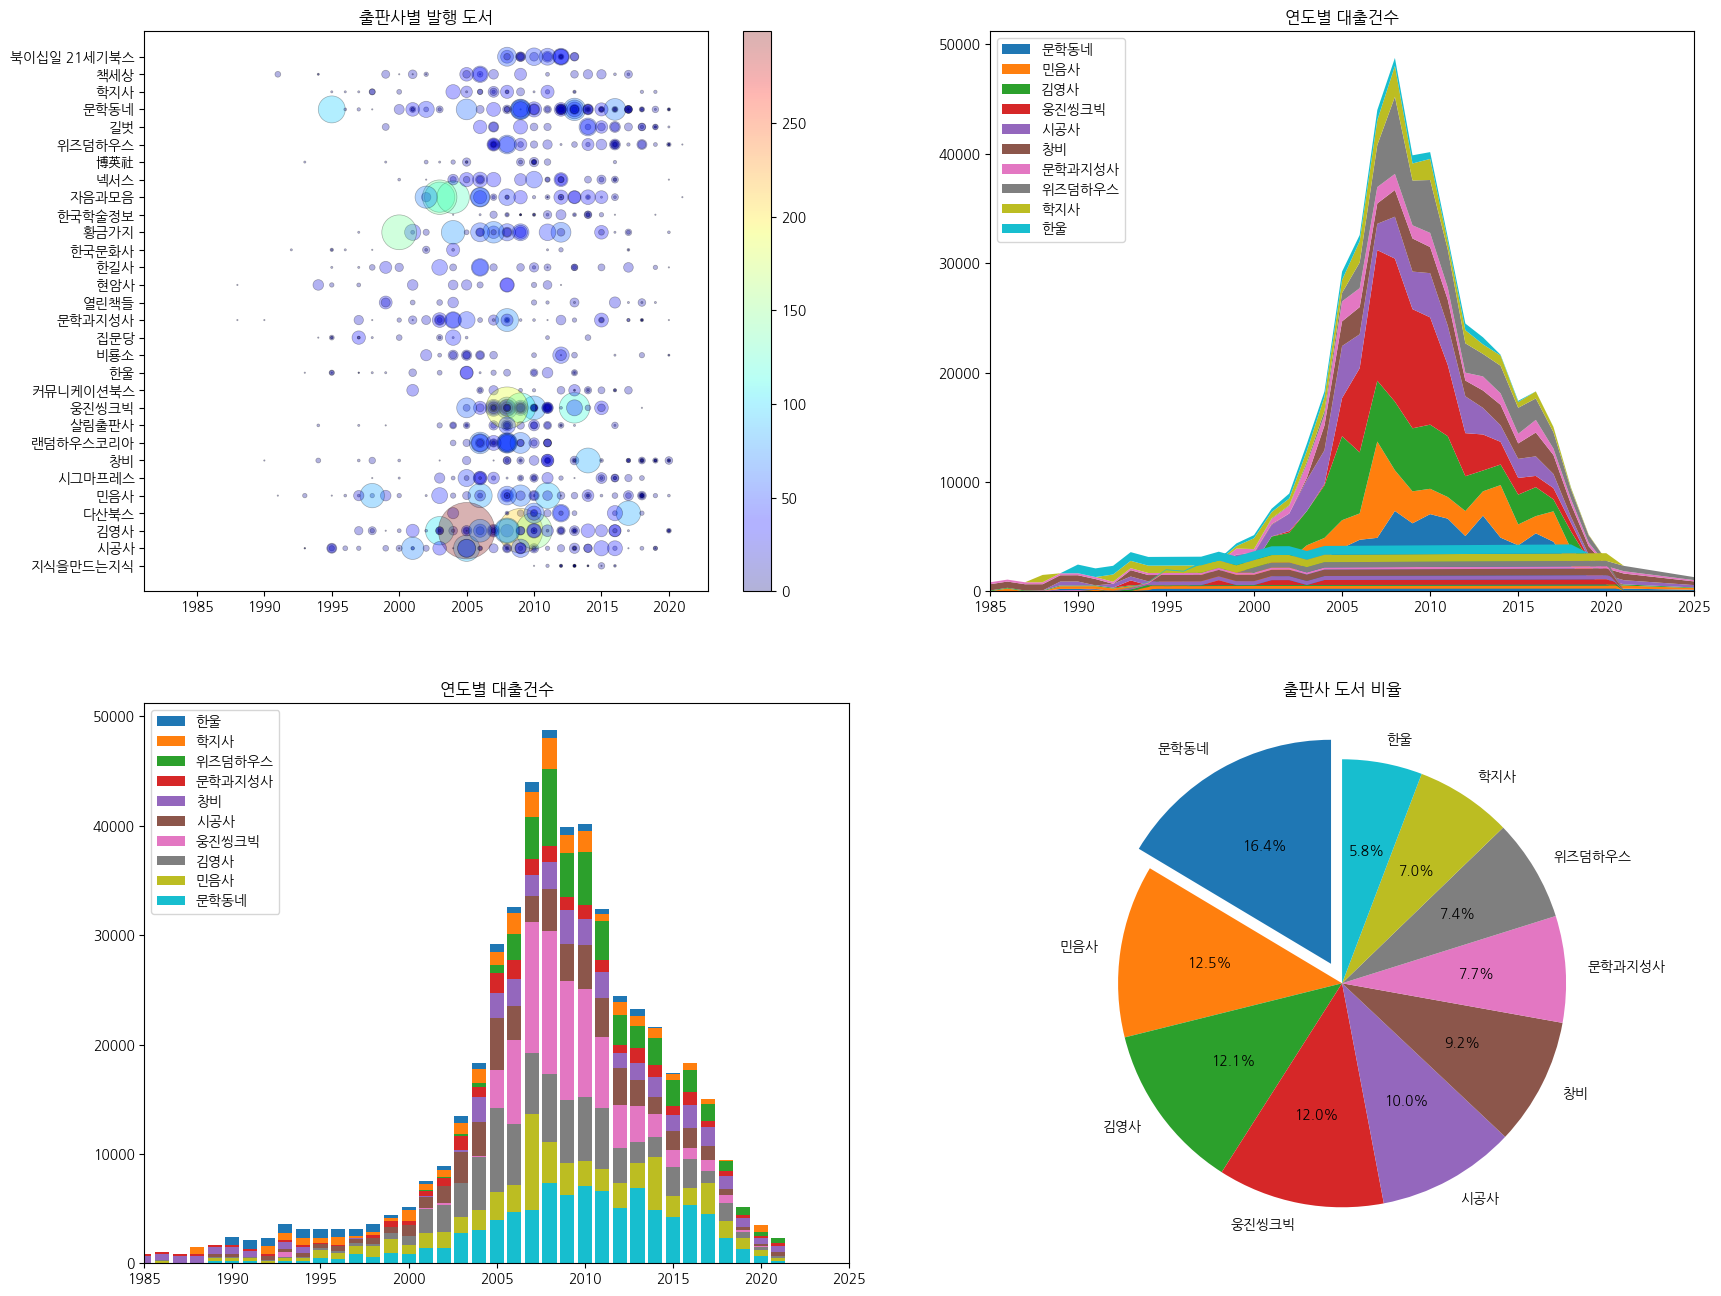

In [53]:
fig, axes = plt.subplots(2,2, figsize=(20,16))


sc = axes[0,0].scatter(ns_book8['발행년도'], ns_book8['출판사'], linewidths=0.5, edgecolors='k', alpha=0.3, s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], cmap='jet')
axes[0,0].set_title('출판사별 발행 도서')
fig.colorbar(sc, ax=axes[0,0])

axes[0,1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axes[0,1].set_title('연도별 대출건수')
axes[0,1].legend(loc='upper left') #범례 왼쪽 상단에 표시
axes[0,1].set_xlim(1985,2025)

for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]
    label = ns_book12.index[i]
    axes[1,0].bar(year_cols, bar, label=label)

axes[1,0].set_title('연도별 대출건수')
axes[1,0].legend(loc='upper left')
axes[1,0].set_xlim(1985,2025)


axes[1,1].pie(data, labels=labels, startangle=90, autopct="%.1f%%", explode=[0.1]+[0]*9)
axes[1,1].set_title('출판사 도서 비율')

fig.savefig('all_in_one.png')
fig.show()